In [21]:
import pandas as pd

veri = {
    "tarih": ["2024-04-01", "2024-04-01", "2024-04-02", "2024-04-02", "2024-04-03", "2024-04-03"],
    "şube": ["Kadıköy", "Beşiktaş", "Kadıköy", "Beşiktaş", "Kadıköy", "Beşiktaş"],
    "satış": [120, 150, 135, 160, 140, 170]
}

df = pd.DataFrame(veri)
df

,tarih,şube,satış
0,2024-04-01,Kadıköy,120
1,2024-04-01,Beşiktaş,150
2,2024-04-02,Kadıköy,135
3,2024-04-02,Beşiktaş,160
4,2024-04-03,Kadıköy,140
5,2024-04-03,Beşiktaş,170


In [22]:
# Günlük toplam satış
# Günlere göre bakıldığında satışların giderek arttığı gözlemleniyor.

gunluk_toplam = df.groupby("tarih")["satış"].sum()
print(gunluk_toplam)

tarih
2024-04-01    270
2024-04-02    295
2024-04-03    310
Name: satış, dtype: int64


In [23]:
# Şubelerin ortalama satış miktarları
# En çok satış Beşiktaş Şubesindedir.

sube_ortalama = df.groupby("şube")["satış"].mean()
print(sube_ortalama)

şube
Beşiktaş    160.000000
Kadıköy     131.666667
Name: satış, dtype: float64


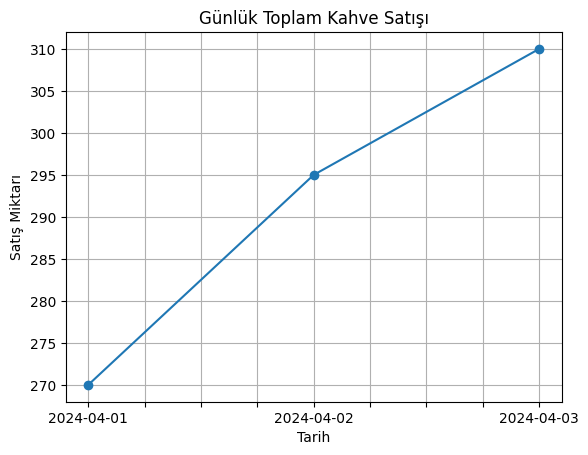

In [24]:
# Tarihe göre topam satış (Çizgi Grafiği)

# Grafikte pozitif eğimli bir doğrusal grafik oluşacak.
# Sebebi;
# * müşteri sayısındaki artış mı?
# * satış miktarındaki artış mı?
# Pazarlama taktiğimiz mi/ kampanyalar mı iyi?
# Hava soğuyunca kahveye talep mi arttı?

import matplotlib.pyplot as plt

gunluk_toplam.plot(kind="line", marker="o", title="Günlük Toplam Kahve Satışı", ylabel="Satış Miktarı", xlabel="Tarih")
plt.grid(True)
plt.show()

In [29]:
# Yeni bir günün verilerini ekleyelim. 04/04/2024 gününün analize grafiğe etkisini görelim.
# pd.concat() eski verilere ekleme yapmamızı sağlar.
yeni_veri = pd.DataFrame({
    "tarih": ["2024-04-04", "2024-04-04"],
    "şube": ["Kadıköy", "Beşiktaş"],
    "satış": [150, 180]
})

df = pd.concat([df, yeni_veri], ignore_index=True)
df

,tarih,şube,satış
0,2024-04-01,Kadıköy,120
1,2024-04-01,Beşiktaş,150
2,2024-04-02,Kadıköy,135
3,2024-04-02,Beşiktaş,160
4,2024-04-03,Kadıköy,140
5,2024-04-03,Beşiktaş,170
6,2024-04-04,Kadıköy,150
7,2024-04-04,Beşiktaş,180


In [30]:
# Yeni tabloya göre analizleri yapalım.

gunluk_toplam = df.groupby("tarih")["satış"].sum()
print(gunluk_toplam)

sube_ortalama = df.groupby("şube")["satış"].mean()
print(sube_ortalama)

tarih
2024-04-01    270
2024-04-02    295
2024-04-03    310
2024-04-04    330
Name: satış, dtype: int64
şube
Beşiktaş    165.00
Kadıköy     136.25
Name: satış, dtype: float64


- 04/04/2024 tarihinde satılan toplam kahve miktarı 330 dur.

- Ortalama satışı yüksek olan Şube yine Beşiktaş Şubesidir.

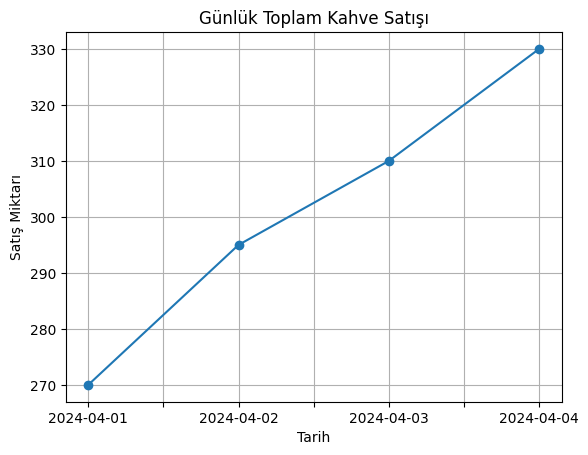

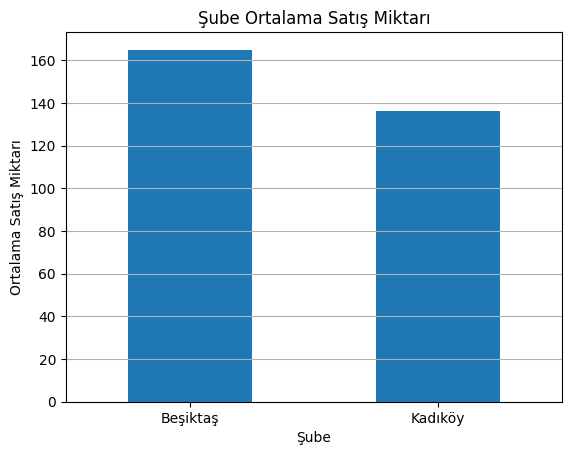

In [32]:
# Şimdi de grafikleri çizelim.

gunluk_toplam.plot(kind="line", marker="o", title="Günlük Toplam Kahve Satışı", ylabel="Satış Miktarı", xlabel="Tarih")
plt.grid(True)
plt.show()

sube_ortalama.plot(kind="bar", title="Şube Ortalama Satış Miktarı", ylabel="Ortalama Satış Miktarı", xlabel="Şube")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

- Toplam satış yeniden artış gösterdi.

- Ortalama satış miktarının yeniden Beşiktaş Şubesi'nde daha fazla olduğunu gözlemliyoruz.


In [33]:
# Kodların anlık kontrolü için;

print(len(df)) # Kaç satır olduğunu gösterir.
print(df.tail()) # Son 5 satırı yazar.

8
        tarih      şube  satış
3  2024-04-02  Beşiktaş    160
4  2024-04-03   Kadıköy    140
5  2024-04-03  Beşiktaş    170
6  2024-04-04   Kadıköy    150
7  2024-04-04  Beşiktaş    180


In [36]:
# ŞİMDİ ANALİZ ZAMANI
# Toplamda en çok satış yapan şubeyi bulalım.

toplam_satis = df.groupby("şube")["satış"].sum()
print(toplam_satis)
# Şubelerin toplam satışlarını yazacak.

en_cok_satis = toplam_satis.idxmax()
print(f"Toplamda en çok satış yapan şube: {en_cok_satis}")
#

şube
Beşiktaş    660
Kadıköy     545
Name: satış, dtype: int64
Toplamda en çok satış yapan şube: Beşiktaş


•⁠ ⁠Lokasyon avantajı → Yüksek yaya trafiği

•⁠ Ofis ortamı → Gün içinde kahve tüketimi artar

•⁠ Öğrenci yoğunluğu → Düşük fiyatlı hızlı tüketim

•⁠ İnsan faktörü (çalışanlar) → Sadık müşteri yaratır